# Data Exploration

This Notebook explores the datasets described below:

## NASA Turbofan Data

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine – i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:

1) unit number
2) time, in cycles
3) operational setting 1
4) operational setting 2
5) operational setting 3
6) sensor measurement 1
7) sensor measurement 2
...
26) sensor measurement 21

Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, “Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation”, in the Proceedings of the Ist International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008

In [1]:
import turbo as tb
import rul_dataframe as rd
import plots as pl

In [2]:
from tabulate import tabulate # for latex tables
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

The first part of this exploration notebook is a general description of the respective training data and basic plots.

In [12]:
# custom functions for loading data (turbo.py)
tr1, te1, rl1 = tb.getTFDataset(set = 1)
tb.addTFlinear(tr1, te1, rl1)
tr2, te2, rl2 = tb.getTFDataset(set = 2)
tb.addTFlinear(tr2, te2, rl2)
tr3, te3, rl3 = tb.getTFDataset(set = 3)
tb.addTFlinear(tr3, te3, rl3)
tr4, te4, rl4 = tb.getTFDataset(set = 4)
tb.addTFlinear(tr4, te4, rl4)

# data frame extension for RUL
tr1_df = rd.RUL_DataFrame(df = tr1, label_cols = ['linear'])
tr2_df = rd.RUL_DataFrame(df = tr2, label_cols = ['linear'])
tr3_df = rd.RUL_DataFrame(df = tr3, label_cols = ['linear'])
tr4_df = rd.RUL_DataFrame(df = tr4, label_cols = ['linear'])

In [5]:
import preprocessing as pre
import classification as cls
preproc = pre.Preprocessing()
classy = cls.Classification()

In [6]:
classy.fit_kmeans(tr4_df)
classy.get_fault_modes(tr4_df)

In [7]:
tr4_df.class_cols

['kmeans_settings', 'kmeans_fault_modes']

In [8]:
rul_df = tr1_df

In [9]:
tr1_df.df

,id,dt,set1,set2,set3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,linear
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [10]:
rul_df.df = rul_df.df.drop(rul_df.df.groupby(rul_df.id_col).head(9).index, axis=0)

In [11]:
tr1_df.df

,id,dt,set1,set2,set3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,linear
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694,182
10,1,11,0.0018,-0.0003,100.0,518.67,642.28,1581.75,1400.64,14.62,...,2388.01,8140.58,8.4340,0.03,392,2388,100.0,38.94,23.4787,181
11,1,12,0.0016,0.0002,100.0,518.67,642.06,1583.41,1400.15,14.62,...,2388.02,8134.25,8.3938,0.03,391,2388,100.0,39.06,23.3660,180
12,1,13,-0.0019,0.0004,100.0,518.67,643.07,1582.19,1400.83,14.62,...,2388.08,8128.10,8.4152,0.03,393,2388,100.0,38.93,23.2757,179
13,1,14,0.0009,-0.0000,100.0,518.67,642.35,1592.95,1399.16,14.62,...,2388.00,8134.43,8.3964,0.03,393,2388,100.0,39.18,23.3826,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [13]:
preproc.one_hot_encode(tr4_df, c_col = 'kmeans_settings')
preproc.one_hot_encode(tr4_df, c_col = 'kmeans_fault_modes')

In [14]:
tr4_df.categ_cols

['kmeans_settings_5',
 'kmeans_settings_4',
 'kmeans_settings_2',
 'kmeans_settings_0',
 'kmeans_settings_3',
 'kmeans_settings_1',
 'kmeans_fault_modes_0',
 'kmeans_fault_modes_1']

In [16]:
o_cols = ['kmeans_settings_5','kmeans_settings_4','kmeans_settings_2','kmeans_settings_0','kmeans_settings_3','kmeans_settings_1']
f_cols = ['kmeans_fault_modes_0','kmeans_fault_modes_1']
# preproc.of_scale(tr4_df, o_cols = o_cols, f_cols = f_cols, scale = 'std')

In [17]:
classy.fit_kmeans(tr4_df)
preproc.one_hot_encode(tr4_df)
preproc.c_scale(tr4_df, c_cols = o_cols, scale = 'std')
classy.fit_kmeans(tr2_df)
preproc.one_hot_encode(tr2_df)
preproc.c_scale(tr2_df, c_cols = tr2_df.categ_cols, scale = 'std')

Warning in Classification.fit_kmeans: kmeans_settings already in use before. Will overwrite old column.


In [17]:
classy.get_fault_modes(tr3_df)
preproc.one_hot_encode(tr3_df, c_col = 'kmeans_fault_modes')
preproc.c_scale(tr3_df, c_cols = f_cols, scale = 'std')

Scan for missing values.

In [6]:
for d in range(1,5):
    tr_df = eval(f'tr{d}_df')
    if tr_df.df.isnull().values.any():
        print(f'Missing values in FD00{d}')
    else:
        print(f'No missing values in FD00{d}')

No missing values in FD001
No missing values in FD002
No missing values in FD003
No missing values in FD004


Show head of data.

In [6]:
# select which set's training data should be shown
d = 4
tr_df = eval(f'tr{d}_df')
# select latex mode (table output is in tabular format)
latex = False
if not latex:
    print(tr_df.df.head())
else:
    # for latex, with adjusted columns such that it fits width of documents
    print(tabulate(tr_df.df[['id','dt','set1','set2','set3','s1','s2','s3','s4','s5']].head(), headers=['id','dt','set1','set2','set3','s1','s2','s3','s4','s5'], tablefmt='latex'))

   id  dt     set1    set2   set3      s1      s2       s3       s4    s5  \
0   1   1  42.0049  0.8400  100.0  445.00  549.68  1343.43  1112.93  3.91   
1   1   2  20.0020  0.7002  100.0  491.19  606.07  1477.61  1237.50  9.35   
2   1   3  42.0038  0.8409  100.0  445.00  548.95  1343.12  1117.05  3.91   
3   1   4  42.0000  0.8400  100.0  445.00  548.70  1341.24  1118.03  3.91   
4   1   5  25.0063  0.6207   60.0  462.54  536.10  1255.23  1033.59  7.05   

   ...    s20      s21  linear  kmeans_settings  kmeans_settings_5  \
0  ...  10.62   6.3670     320                5                  1   
1  ...  24.37  14.6552     319                4                  0   
2  ...  10.48   6.4213     318                5                  1   
3  ...  10.54   6.4176     317                5                  1   
4  ...  14.03   8.6754     316                2                  0   

   kmeans_settings_4  kmeans_settings_2  kmeans_settings_0  kmeans_settings_3  \
0                  0               

Description of the dataset.

In [22]:
# select which set's training data should be shown
d = 4
tr_df = eval(f'tr{d}_df')
# select latex mode (table output is in tabular format)
latex = False
if not latex:
    print(tr_df.df.describe().T)
else:
    # for latex, column count not needed
    print(tabulate(tr_df.df.describe().T[['mean','std','min','25%','50%','75%','max']],headers=['mean','std','min','25%','50%','75%','max'],tablefmt='latex'))

                     count          mean        std        min         25%  \
id                 61249.0  1.243252e+02  71.995350   1.000000   60.000000   
dt                 61249.0  1.343114e+02  89.783389   1.000000   62.000000   
set1               61249.0  2.399982e+01  14.780722   0.000000   10.004600   
set2               61249.0  5.713469e-01   0.310703   0.000000    0.250700   
set3               61249.0  9.403158e+01  14.251954  60.000000  100.000000   
s1                 61249.0  0.000000e+00   0.000000   0.000000    0.000000   
s2                 61249.0 -6.032461e-18   1.000008  -3.298558   -0.706208   
s3                 61249.0  9.280710e-19   1.000008  -3.303853   -0.700052   
s4                 61249.0 -4.640355e-18   1.000008  -3.081332   -0.726596   
s5                 61249.0  0.000000e+00   0.000000   0.000000    0.000000   
s6                 61249.0  1.856142e-18   1.000008  -3.979054   -0.750207   
s7                 61249.0  3.712284e-18   1.000008  -2.662910  

We can see which sensors have zero or almost zero variance.

Next: Plots.

In [18]:
# select which set's training data should be shown
d = 4
tr_df = eval(f'tr{d}_df')
tr_plots = pl.Plots(tr_df)
# preproc.exponential_smooth(tr_df)

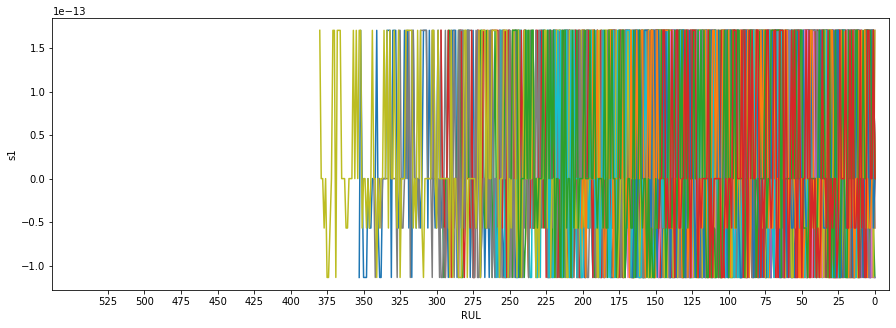

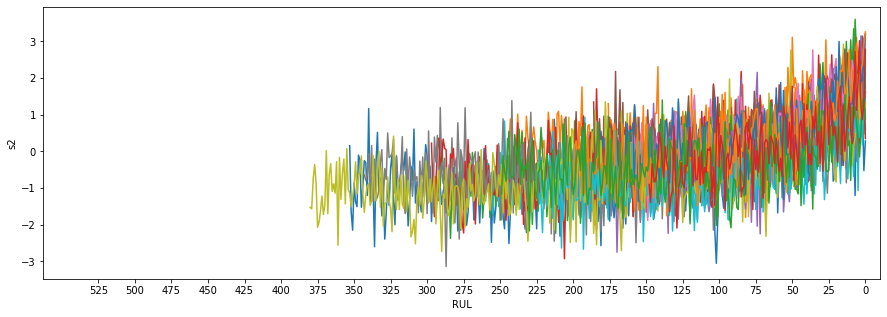

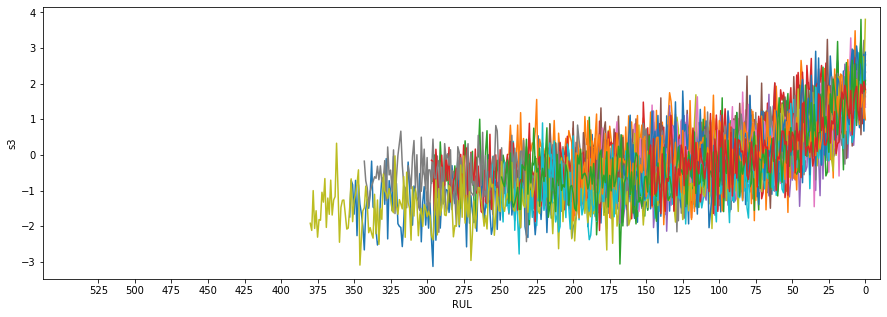

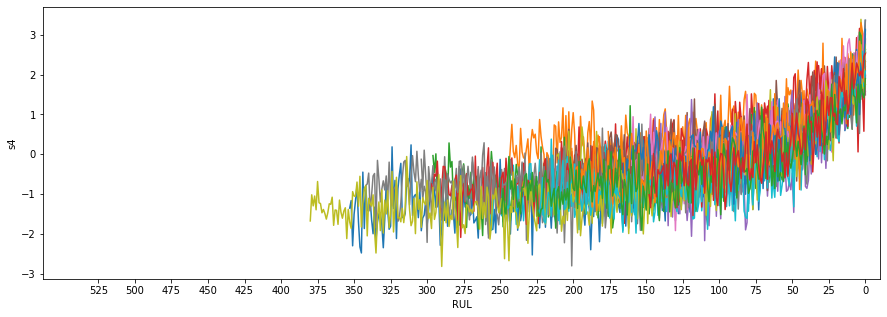

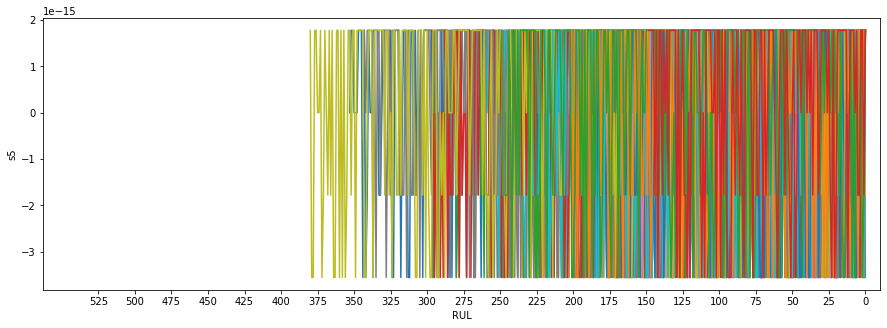

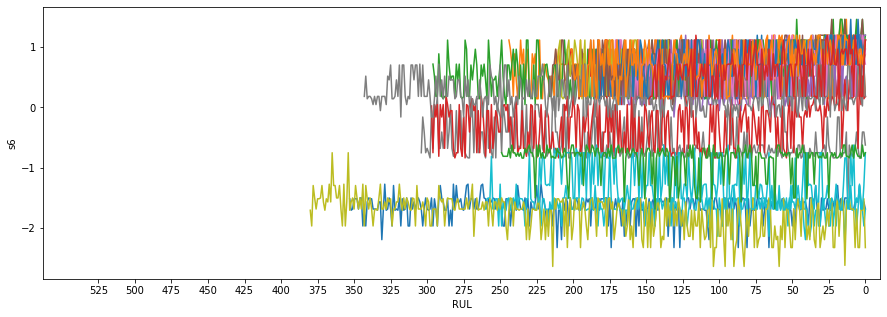

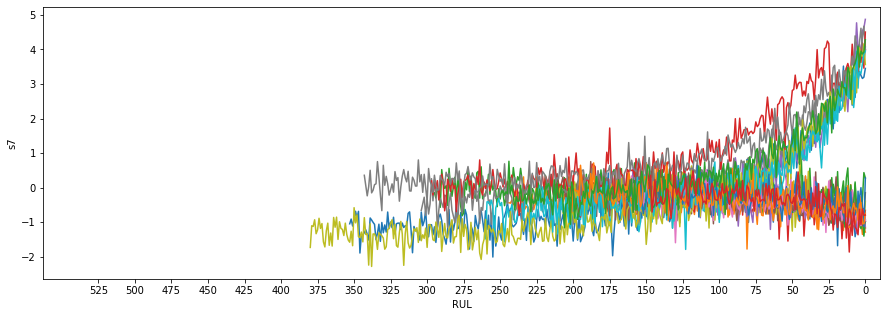

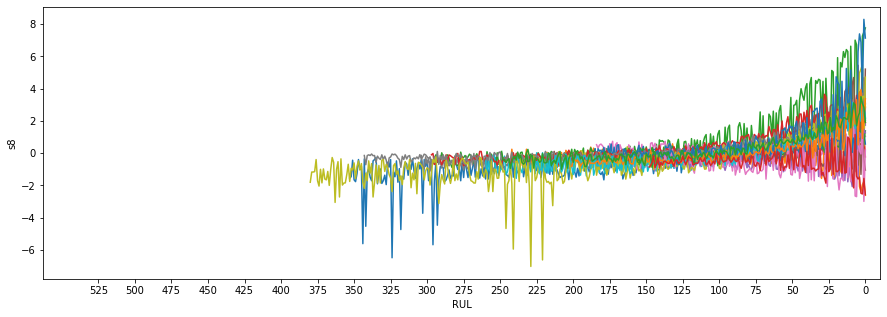

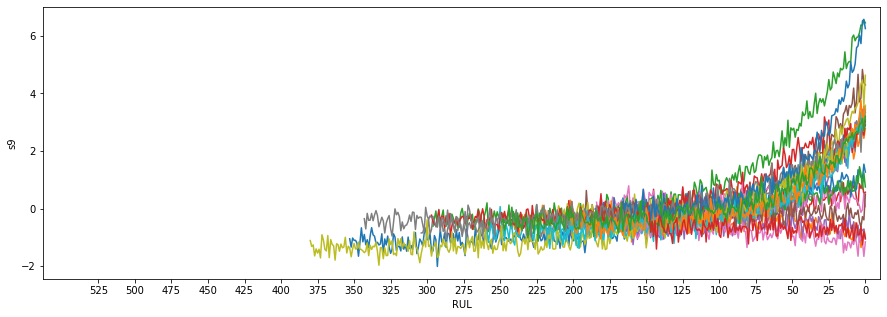

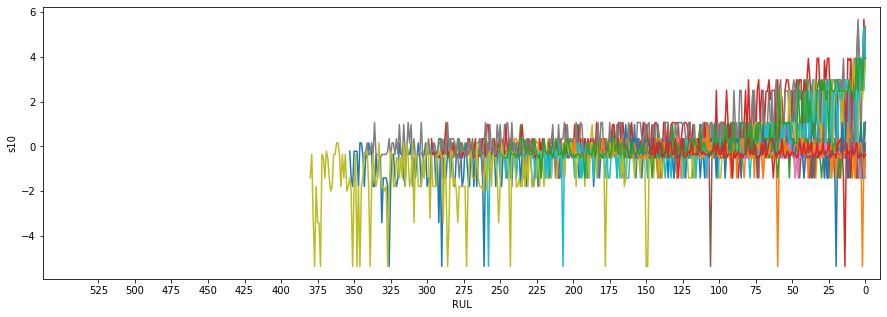

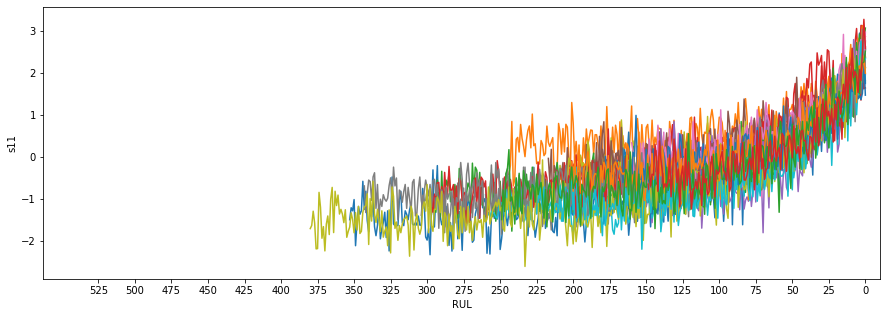

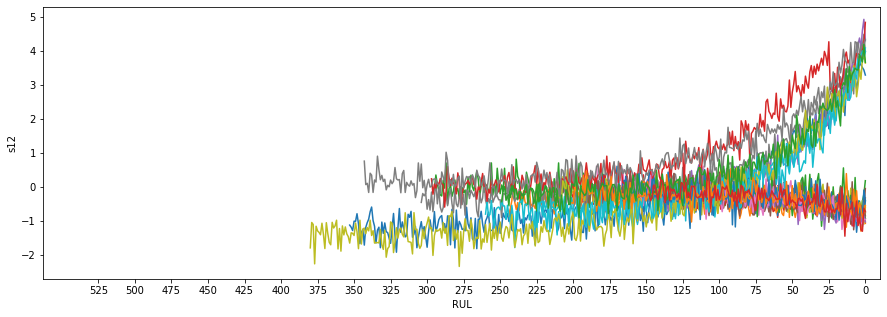

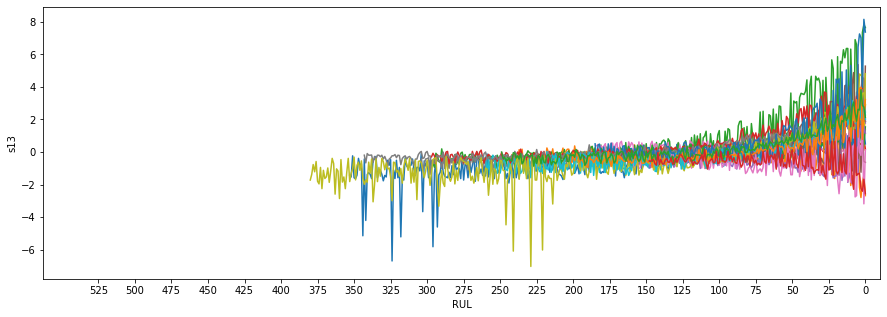

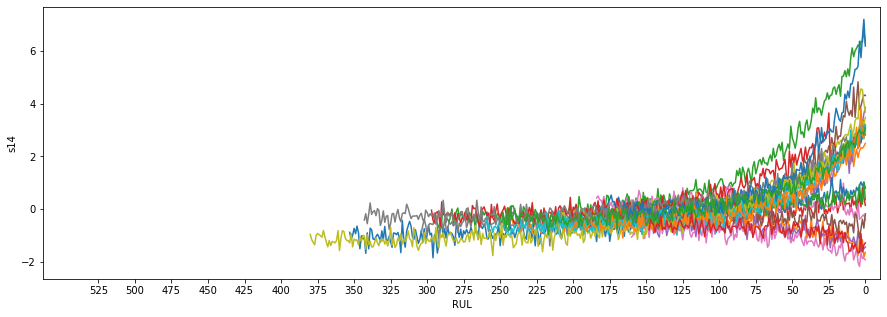

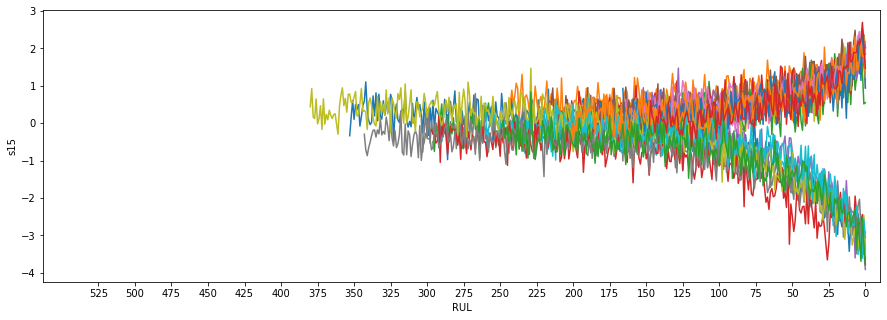

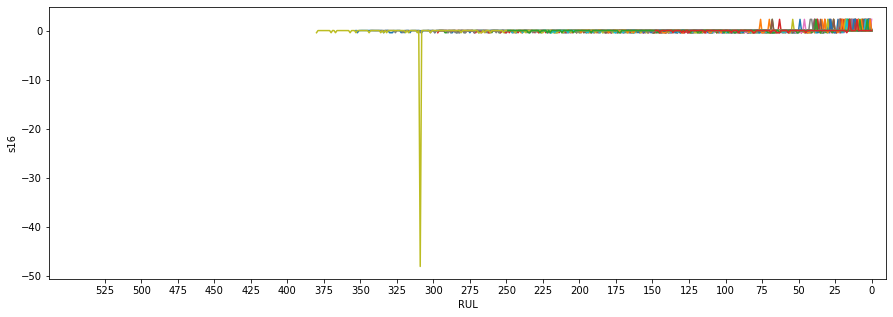

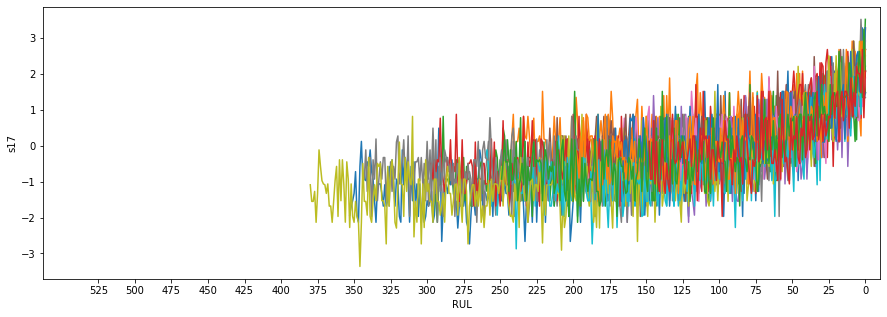

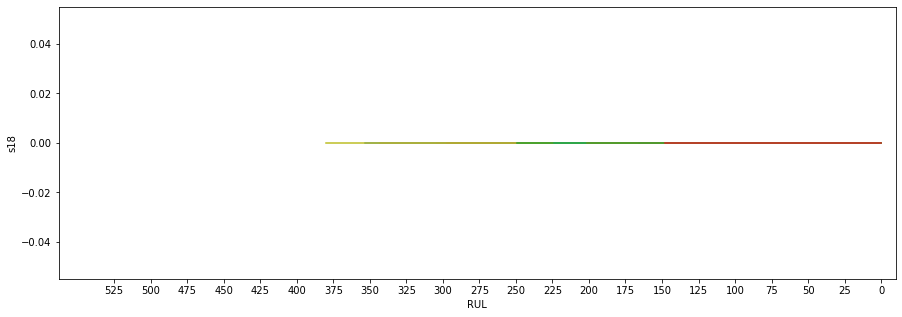

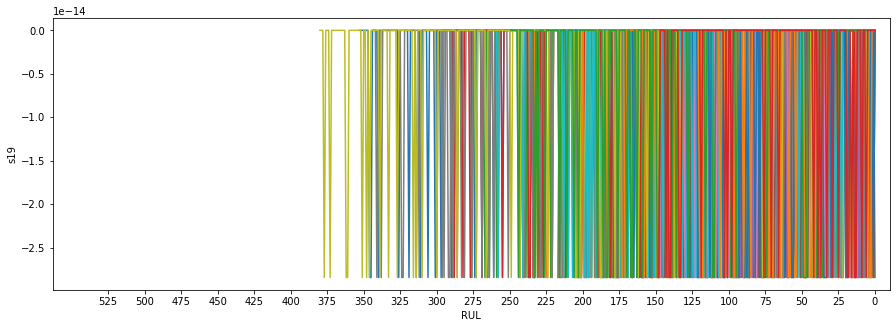

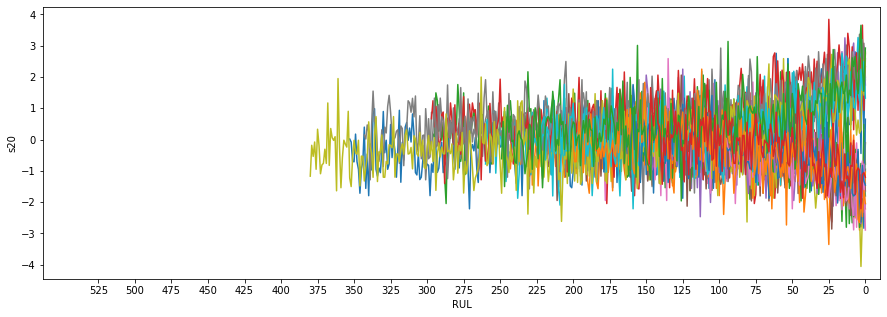

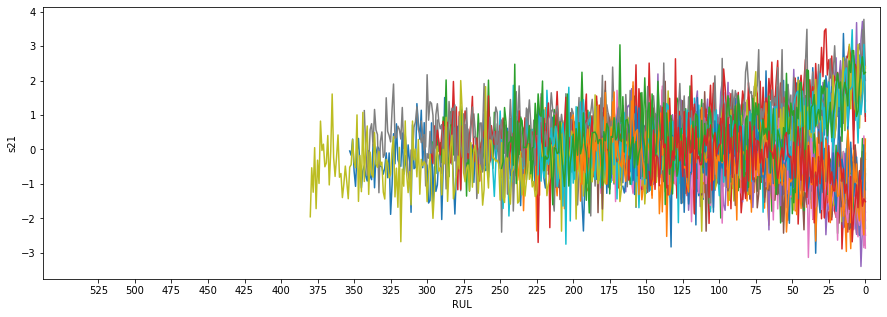

In [19]:
for s in tr_df.data_cols:
    tr_plots.reversetimeplot_column(s)
    # tr_plots.timeplot_column(s)

In [23]:
# not helpful
#for i in range(len(tr_df.data_cols)-1):
#    for j in range(i+1,len(tr_df.data_cols)):
#        tr_plots.scatter_sensors(tr_df.data_cols[i], tr_df.data_cols[j])

In [24]:
#max_lag = 3
#for s in tr_df.data_cols:
#    for l in range(max_lag):
#        tr_plots.lagplot_sensor_asset(sensor  = s, asset = 1, lag = l + 1)

In [25]:
#for s in tr_df.data_cols:
#    if not tr_df.df[s].var() <= 0.001:
#        print(s)
#        tr_plots.autocorrelationplot_sensor(s)

In [26]:
#for s in tr_df.data_cols:
#    if not tr_df.df.loc[tr_df.df[tr_df.id_col]==1, s].var() <= 0.001:
#        print(s)
#        tr_plots.autocorrelationplot_sensor_asset(s, asset = 1)

<AxesSubplot:>

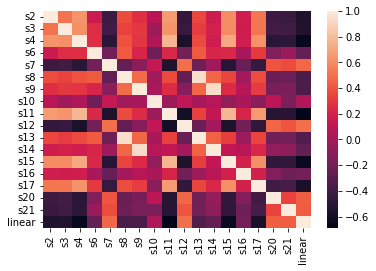

In [30]:
sensors_heatmap = []
for s in tr_df.data_cols:
    if tr_df.df[s].var() >= 0.001:
        sensors_heatmap.append(s)
corr = tr_df.df[sensors_heatmap + ['linear']].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

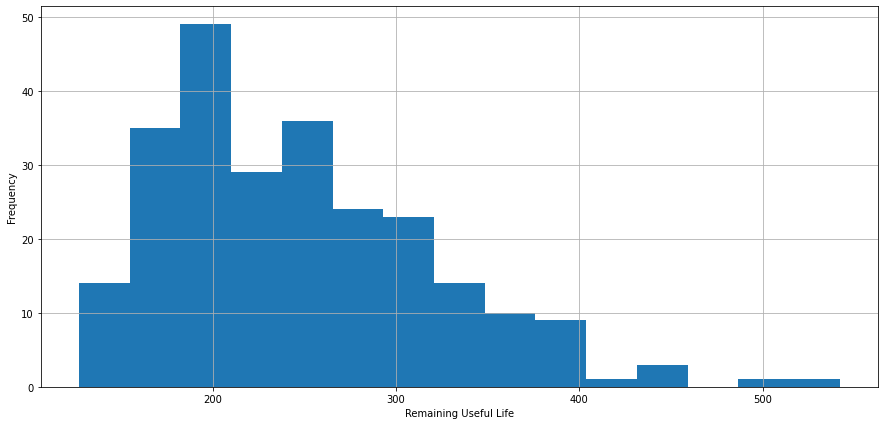

In [15]:
df_max_rul = tr_df.df[[tr_df.id_col, 'linear']].groupby(tr_df.id_col).max().reset_index()
df_max_rul['linear'].hist(bins=15, figsize=(15,7))
plt.xlabel('Remaining Useful Life')
plt.ylabel('Frequency')
plt.show()

In [23]:
import pandas as pd
for dataset in [1,2,3,4]:
    tr_df = eval(f'tr{dataset}_df')
    df_max_rul = tr_df.df[[tr_df.id_col, 'linear']].groupby(tr_df.id_col).max().reset_index()
    print(df_max_rul['linear'].min())
    scale_optimized = pd.read_csv(f'fault_steps/FD00{dataset}')['Scale'].values
    print((scale_optimized < 70).sum())

127
6
127
18
144
3
127
9


Next: Operating Modes.

In [16]:
df_max_rul

,id,linear
0,1,320
1,2,298
2,3,306
3,4,273
4,5,192
...,...,...
244,245,204
245,246,160
246,247,210
247,248,183


"\nf3D = fig.add_subplot(221, projection='3d')\nf3D.scatter3D(points[:,0], points[:,1], points[:,2])\nf3D.set_xlabel('set1')\nf3D.set_ylabel('set2')\nf3D.set_zlabel('set3')\n\nf12 = fig.add_subplot(222)\nf12.scatter(points[:,0], points[:,1])\nf12.set_xlabel('set1')\nf12.set_ylabel('set2')\n\nf13 = fig.add_subplot(223)\nf13.scatter(points[:,0], points[:,2])\nf13.set_xlabel('set1')\nf13.set_ylabel('set3')\n\nf23 = fig.add_subplot(224)\nf23.scatter(points[:,1], points[:,2])\nf23.set_xlabel('set2')\nf23.set_ylabel('set3')\nplt.show()\n"

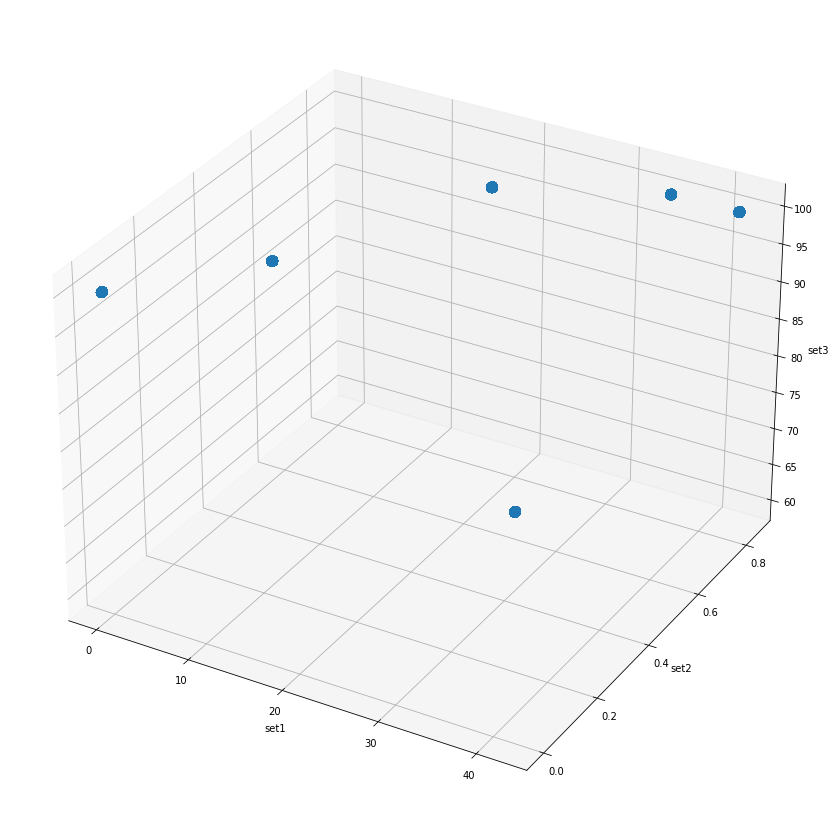

In [8]:
points = tr4_df.df[tr4_df.option_cols].values

%matplotlib inline

fig = plt.figure(figsize=(15,15))

f3D = fig.add_subplot(projection='3d')
f3D.scatter3D(points[:,0], points[:,1], points[:,2], s=100)
f3D.set_xlabel('set1')
f3D.set_ylabel('set2')
f3D.set_zlabel('set3')
'''
f3D = fig.add_subplot(221, projection='3d')
f3D.scatter3D(points[:,0], points[:,1], points[:,2])
f3D.set_xlabel('set1')
f3D.set_ylabel('set2')
f3D.set_zlabel('set3')

f12 = fig.add_subplot(222)
f12.scatter(points[:,0], points[:,1])
f12.set_xlabel('set1')
f12.set_ylabel('set2')

f13 = fig.add_subplot(223)
f13.scatter(points[:,0], points[:,2])
f13.set_xlabel('set1')
f13.set_ylabel('set3')

f23 = fig.add_subplot(224)
f23.scatter(points[:,1], points[:,2])
f23.set_xlabel('set2')
f23.set_ylabel('set3')
plt.show()
'''

The operating modes can be distinguished by simply rounding the settings values.

In [39]:
print(tr_df.df['set1'].round().unique())
print(tr_df.df['set2'].round(decimals=2).unique())
print(tr_df.df['set3'].round().unique())

[-0.]
[-0.]
[100.]


I want to check if kmeans would classify them similarly.

In [80]:
for dd in range(4):
    tr_df = eval(f'tr{dd+1}_df')
    settings = tr_df.df[tr_df.option_cols].copy()
    settings['set1'] = settings['set1'].round()
    settings['set2'] = settings['set2'].round(decimals=2)
    settings['set3'] = settings['set3'].round()
    tr_df.df['eye'] = 0
    tr_df.class_cols.append('eye')
    c = 0
    op_cond =[]
    for i, d in settings.groupby(by = ['set1','set2','set3']):
        op_cond.append(d.head(1).values[0])
        c += 1
        tr_df.df.loc[d.index,['eye']] = c
    n = len(tr_df.df['eye'].unique())
    print(f'Number of settings in FD00{dd + 1} is {n} with settings:')
    for j in range(n):
        print(op_cond[j])

Number of settings in FD001 is 1 with settings:
[ -0.  -0. 100.]
Number of settings in FD002 is 6 with settings:
[  0.   0. 100.]
[ 10.     0.25 100.  ]
[ 20.    0.7 100. ]
[25.    0.62 60.  ]
[ 35.     0.84 100.  ]
[ 42.     0.84 100.  ]
Number of settings in FD003 is 1 with settings:
[ -0.   0. 100.]
Number of settings in FD004 is 6 with settings:
[  0.   0. 100.]
[ 10.     0.25 100.  ]
[ 20.    0.7 100. ]
[25.    0.62 60.  ]
[ 35.     0.84 100.  ]
[ 42.     0.84 100.  ]


In [16]:
clf = cl.Classification()
kms = clf.fit_kmeans(rul_df=tr4_df)

In [17]:
same = True
for i in tr4_df.df['eye'].unique():
    j = tr4_df.df.loc[tr4_df.df['eye'] == i, 'kmeans'].unique().size
    if j != 1:
        print('kmeans not same')
        same = False
if same:
    print('eye and kmeans same')

eye and kmeans same


Then confirm the number of operating modes in the datasets.

In [26]:
md1 = kms.predict(np.asarray(tr_df.df[tr_df.option_cols]))
if np.unique(md1).size == 1:
    print('only one operating mode in set')
if np.unique(md1).size == 6:
    print('6 operating modes in set')

6 operating modes in set


Lastly, for datasets FD002 and FD004 it would be interesting if some sensor readings are equivalent with the operating modes. Per operating mode, investigate if the sensors have zero variance.

In [93]:
for dd in [2,4]:
    tr_df = eval(f'tr{dd}_df')
    print(f'FD00{dd}')
    for i in range(6):
        print(f'Operating Mode {i + 1}:')
        print(np.array(tr_df.data_cols)[tr_df.df.loc[tr_df.df['eye'] == i + 1, tr_df.data_cols].var() <= 0.001])

FD002
Operating Mode 1:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 2:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 3:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 4:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 5:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 6:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
FD004
Operating Mode 1:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 2:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 3:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 4:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 5:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
Operating Mode 6:
['s1' 's5' 's6' 's10' 's16' 's18' 's19']
